In [48]:
import lightkurve as lk
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plot

# Make displayed plots larger
plot.rcParams['figure.figsize'] = [18, 11]

In [49]:
lcs      = lk.search_lightcurve("KOI 97.01", mission="Kepler", cadence="short").download_all()
time     = lcs[0].time.value                    # get the time of each observation
flux     = np.array(lcs[0].flux.value.data)     # get the flux
flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux

In [50]:
import numpy as np
index = np.where((time > 261) & (time < 262))

In [51]:
time_obs = time[index]
flux_obs = flux[index]
flux_err_obs = flux_err[index]



In [52]:

from statistics import mean
#flux_normalization = flux_obs[0]
stdev_flux = np.std(flux)
#mean_flux_obs= np.where((flux_normalized - mean(flux)) / stdev_flux > 2)
#flux_normalized_err = flux_err_obs/flux_normalized

flux_normalization = flux_obs[0]
flux_normalized = flux_obs/flux_normalization
flux_normalized_err = flux_err_obs/flux_normalization

In [53]:
import math
def simpson_int (integrand, lim_0, lim_1, nx):
   

    delx = (lim_1 - lim_0) / float(nx)  #rectangle width
    third = (1.0/3.0)                   #save dividing at every iteration
    

    f_x0 = integrand(lim_0)
    f_xh = integrand(lim_0 + 0.5*delx)
    f_xn = integrand(lim_1)
    #print('f_x0, f_xh, f_xn', f_x0, f_xh, f_xn) #debug
    result = (1.0/6.0)*(f_x0 + 4.0*f_xh + f_xn) * delx
    
  
    for i in np.arange(1,int(nx)):
        x_full = lim_0 + i * delx       
        x_half = lim_0 + (i+0.5) * delx  

        f_xf = integrand(x_full)    
        f_xh = integrand(x_half)
        
        result += third*(f_xf + 2.0*f_xh)*delx  
        
    return result

def physical_limb(r):
    
    mu = math.sqrt(1-r*r)   #cos theta
    return 1.0 - (1.0 - mu**.5)


In [60]:
p = 0.0775
tau = 0.1
t0 = 261.3
z = (time_obs-t0)/tau

def kappa0(p, z):
    return math.acos((p**2 + z**2 - 1)/(2*p*z))
def kappa1(p, z):
    return math.acos((1 - p**2 + z**2)/(2*z))
def lambd(p, z):
    if 1 + p < z:
        return 0
    if z <= 1 - p:
        return p**2
    if z <= p - 1:
        return 1
    arg = (4*z**2 - (1 + z**2 - p**2)**2)/4
    if arg >= 0:
        return (kappa0(p, z)*p**2 + kappa1(p, z) - math.sqrt(arg))/math.pi
    else:
        return 0
def FluxRatio(p, z):
    """ 
    Compute the ratio of obscured/unobscured flux for a planet transit.

    Arguments:
       p - ratio of planet radius to stellar radius
       z - distance between star and planet divided by stellar radius
    Returns:
       FluxRatio - ratio of obscured to unobscured stellar flux

    """
    return 1 - lambd(p, abs(z))




    

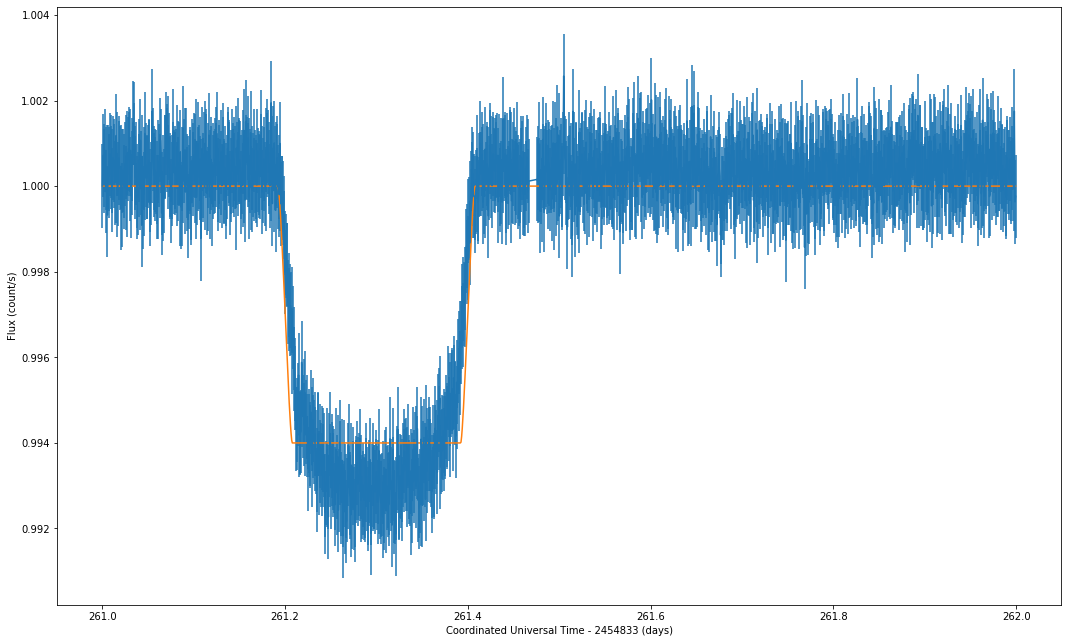

In [61]:



flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

In [56]:
# PROBLEM 2
# I would say that this is not the best fit that we could get. If we were to adjust the value of p, we get a fit that is more ideal.

In [57]:
N = len(flux)
print(N)
M = 3

43097


In [62]:
#PROBLEM 3
p = 0.0775
tau = 0.08
t0 = 261.3
z = (time_obs-t0)/tau

def kappa0(p, z):
    return math.acos((p**2 + z**2 - 1)/(2*p*z))
def kappa1(p, z):
    return math.acos((1 - p**2 + z**2)/(2*z))
def lambd(p, z):
    if 1 + p < z:
        return 0
    if z <= 1 - p:
        return p**2
    if z <= p - 1:
        return 1
    arg = (4*z**2 - (1 + z**2 - p**2)**2)/4
    if arg >= 0:
        return (kappa0(p, z)*p**2 + kappa1(p, z) - math.sqrt(arg))/math.pi
    else:
        return 0
def FluxRatio(p, z):
    """ 
    Compute the ratio of obscured/unobscured flux for a planet transit.

    Arguments:
       p - ratio of planet radius to stellar radius
       z - distance between star and planet divided by stellar radius
    Returns:
       FluxRatio - ratio of obscured to unobscured stellar flux

    """
    return 1 - lambd(p, abs(z))

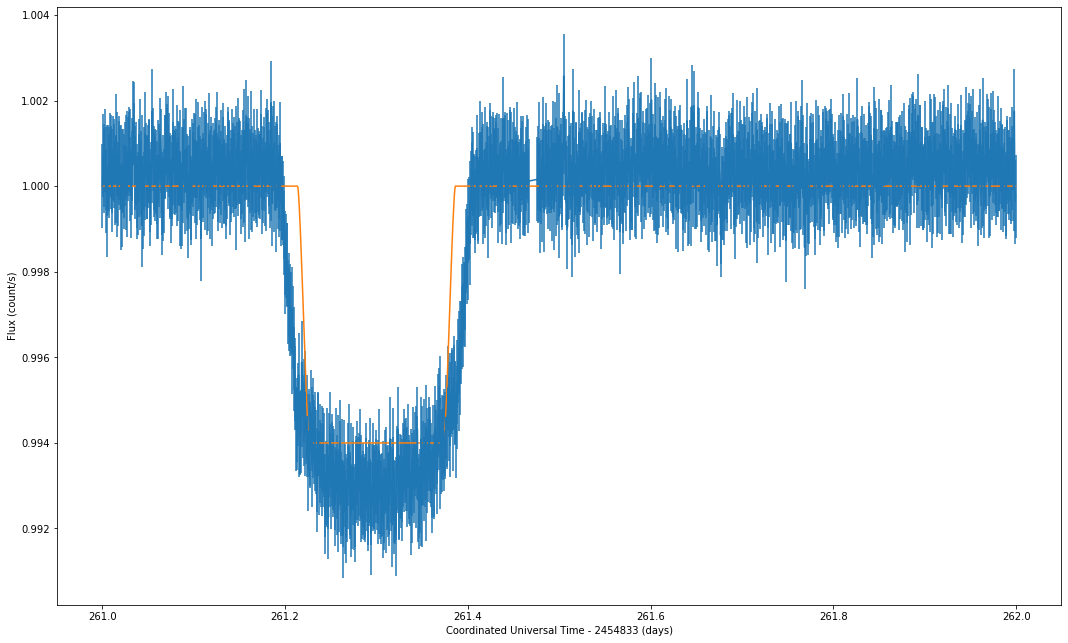

In [63]:
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

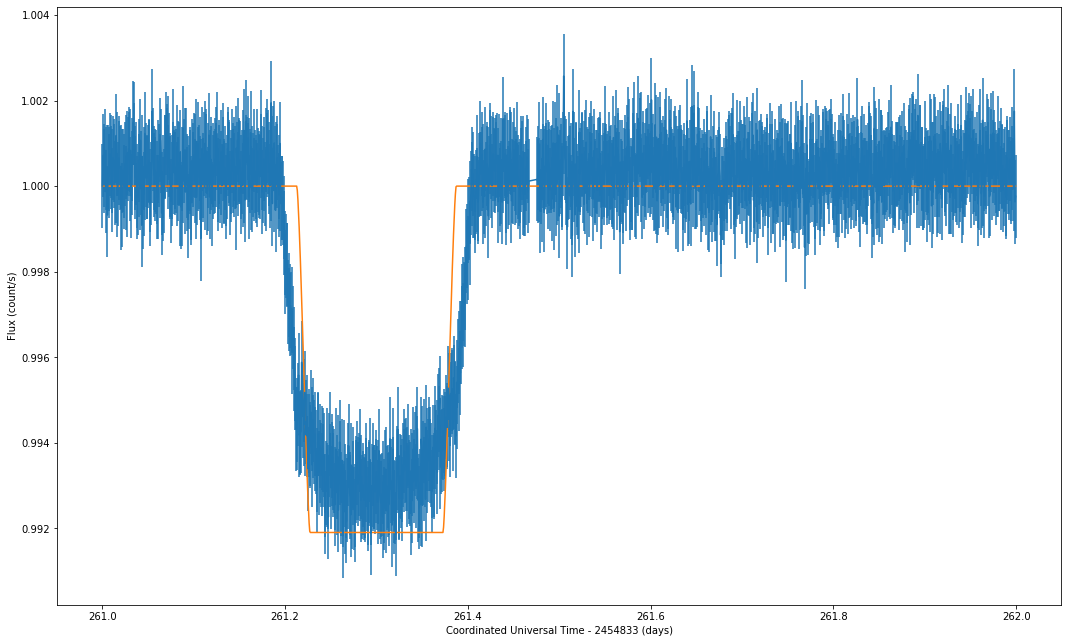

In [64]:
p= 0.09
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

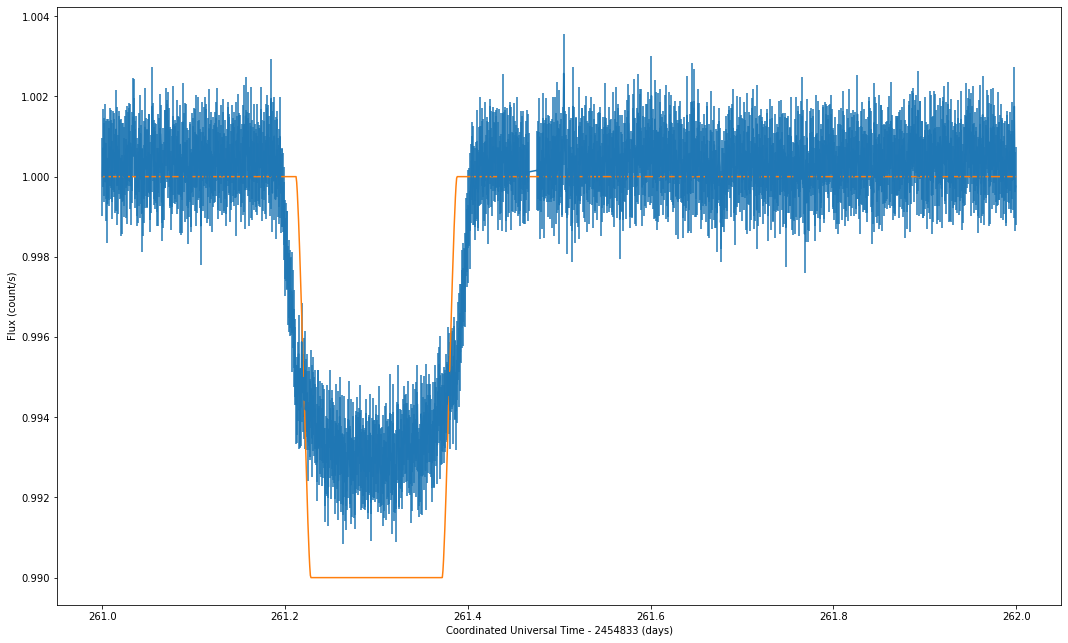

In [65]:
p= 0.1
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

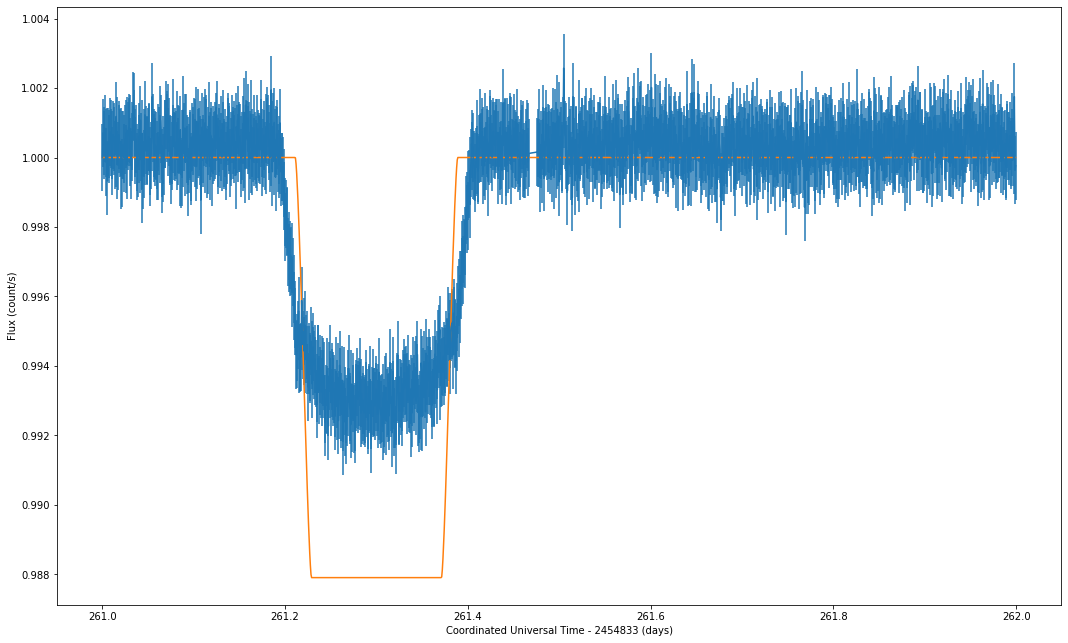

In [66]:
p= 0.11
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

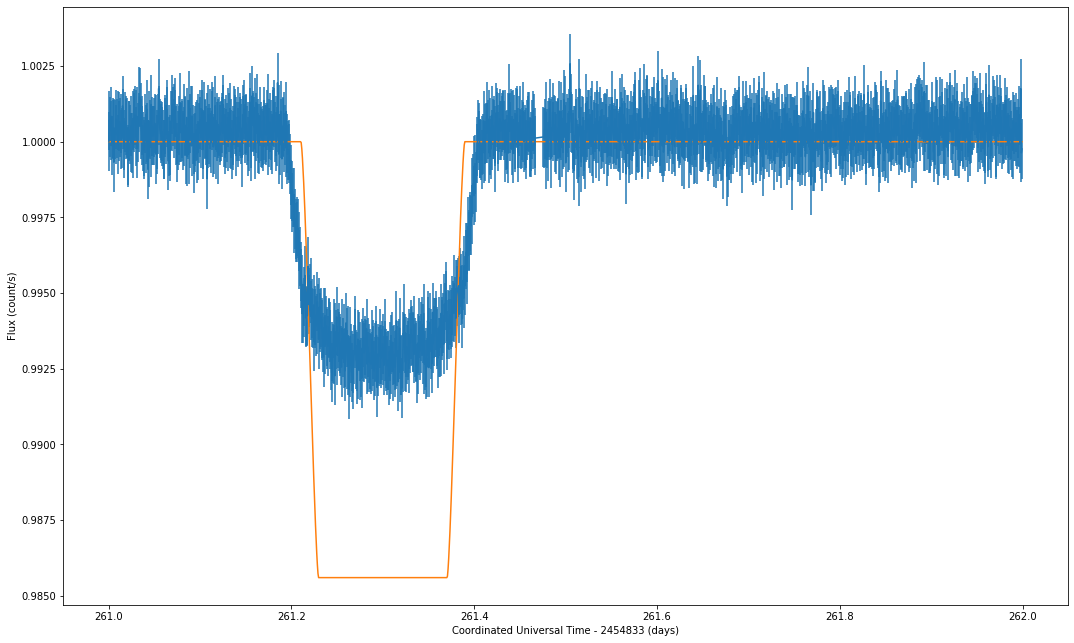

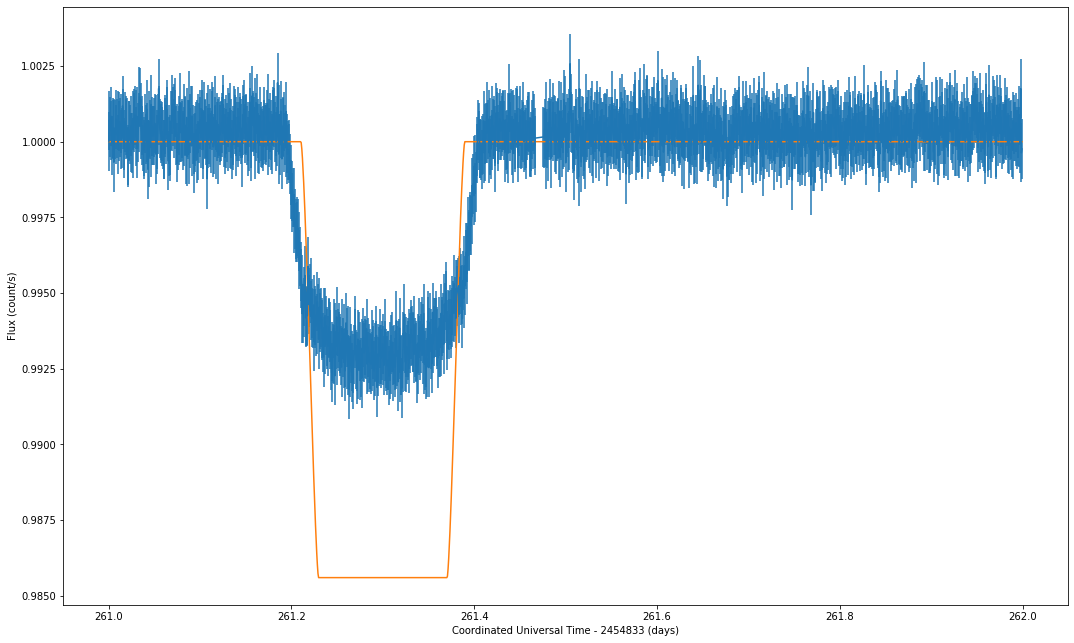

In [67]:
p= 0.12
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()

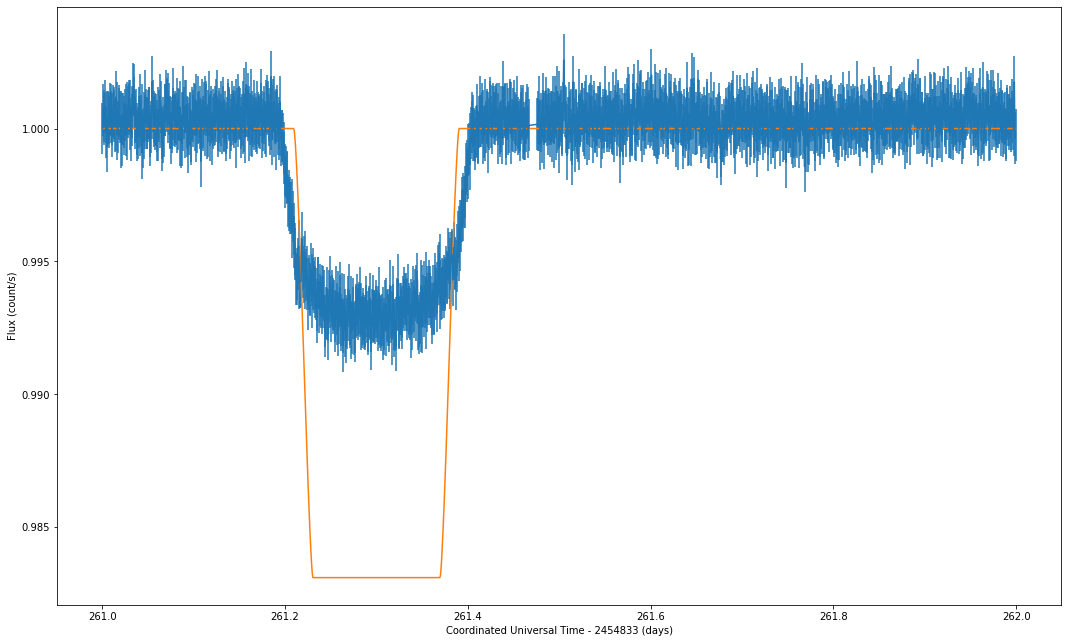

In [68]:
p= 0.13
flux_predicted = []
for zval in z:
    flux_predicted.append(FluxRatio(p, zval))
    
plot.errorbar(time_obs, flux_normalized, yerr=2*flux_normalized_err)
plot.plot(time_obs, flux_predicted)
plot.xlabel("Coordinated Universal Time - 2454833 (days)")
plot.ylabel("Flux (count/s)")
plot.show()